There are three main parts to this project:

**Part 1** : Investigating OpenCV, pre-processing, and face detection

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

---

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

* [Step 5](#step5): Create a CNN to Recognize Facial Keypoints
* [Step 6](#step6): Compile and Train the Model
* [Step 7](#step7): Visualize the Loss and Answer Questions

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

* [Step 8](#step7): Build a Robust Facial Keypoints Detector (Complete the CV Pipeline)



## Step 0: Detect Faces Using a Haar Cascade Classifier
We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `detector_architectures` directory.


### Import Resources 

In [1]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

In [ ]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    
# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step1'></a>

## Step 1: Add Eye Detections

There are other pre-trained detectors available that use a Haar Cascade Classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

To test your eye detector, we'll first read in a new test image with just a single face.

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/fawzia.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

In [ ]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x_face,y_face,w_face,h_face) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x_face,y_face), (x_face+w_face,y_face+h_face), (255,0,0), 3)

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### Add an eye detector to the current face detection setup.  


In [2]:
# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  
    
# Do not change the code above this comment!
    
## TODO: Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm
## TODO: Loop over the eye detections and draw their corresponding boxes in green on image_with_detections

# Extract the pre-trained eye detector from an xml file
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Detect the eyes within each face rectangle
# Note: had to bring the scaleFactor param down a bit to make this work
for (x_face,y_face,w_face,h_face) in faces:
    # Limit eye detection to the face rectangle to speed things up
    eyes = eye_cascade.detectMultiScale(image_with_detections[y_face:y_face+h_face, x_face:x_face+w_face], 1.10, 6)
    for (x_eye,y_eye,w_eye,h_eye) in eyes:
        # Add a green bounding box to the detections image for each eye
        # Note that eye coordinates are are relative to the face rectangle now!
        cv2.rectangle(image_with_detections, (x_face+x_eye,y_face+y_eye), (x_face+x_eye+w_eye,y_face+y_eye+h_eye), (0,255,0), 3)

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

NameError: name 'image' is not defined

In [3]:
### Add face and eye detection to this laptop camera function 
# Make sure to draw out all faces/eyes found in each frame on the shown video feed

import cv2
import time 

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("Face+Eye Detector [Press ESC to exit]")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Extract the pre-trained face and eye detectors from xml files
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

    # Keep the video stream open
    while rval:
        
        # Make a copy of the original color image to plot rectangle detections
        image_with_detections = np.copy(frame)   

        # Convert the RGB video frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        
        # Detect the face(s) in the video frame
        faces = face_cascade.detectMultiScale(gray_frame, 1.25, 6)
        
        # Detect the eyes within each face rectangle
        # Note: had to bring the scaleFactor param down a bit to make this work
        for (x_face,y_face,w_face,h_face) in faces:
            # Display each face rectangle in the color image
            cv2.rectangle(image_with_detections, (x_face,y_face), (x_face+w_face,y_face+h_face), (0,0,255), 3)  
            # Limit eye detection to the face rectangle to speed things up
            eyes = eye_cascade.detectMultiScale(gray_frame[y_face:y_face+h_face, x_face:x_face+w_face], 1.10, 6)
            for (x_eye,y_eye,w_eye,h_eye) in eyes:
                # Add a green bounding box to the detections image for each eye
                # Note that eye coordinates are are relative to the face rectangle now!
                cv2.rectangle(image_with_detections, (x_face+x_eye,y_face+y_eye), (x_face+x_eye+w_eye,y_face+y_eye+h_eye), (0,255,0), 3)

        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("Face+Eye Detector [Press ESC to exit]", image_with_detections)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key == 27: # Exit by pressing ESC key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

ModuleNotFoundError: No module named 'cv2'

In [4]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()

NameError: name 'laptop_camera_go' is not defined

---
<a id='step2'></a>

## Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

### Create a noisy image to work with

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

In [5]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

NameError: name 'cv2' is not defined

In [6]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

NameError: name 'cv2' is not defined

With this added noise we now miss one of the faces!

###  De-noise this image for better face detection

In [7]:
## TODO: Use OpenCV's built in color image de-noising function to clean up our noisy image!

# cv2.fastNlMeansDenoisingColored(src[, dst[, h[, hColor[, templateWindowSize[, searchWindowSize]]]]]) -> dst
# Common arguments are:
# src : Input 8-bit 3-channel image
# dst : Output image with the same size and type as src
# h : Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise. (20 is ok)
# hColor :  The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors. (20 is ok)
# templateWindowSize : Size in pixels of the template patch that is used to compute weights. Should be odd. (recommended 7)
# searchWindowSize : Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. (recommended 21)
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 20, 20, 7, 21)

# Plot our denoised image
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Denoised Image')
ax1.imshow(denoised_image)

NameError: name 'cv2' is not defined

In [8]:
## TODO: Run the face detector on the de-noised image to improve your detections and display the result

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Make a copy of the original denoised image to plot rectangle detections
image_with_detections = np.copy(denoised_image)   

# Convert the denoised image to grayscale
gray_denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Detect the face(s) in the greyscale denoised image
faces = face_cascade.detectMultiScale(gray_denoised_image, 1.25, 6)

# Display each face rectangle in the denoised image
for (x_face,y_face,w_face,h_face) in faces:
    cv2.rectangle(image_with_detections, (x_face,y_face), (x_face+w_face,y_face+h_face), (255,0,0), 3)  

# Plot the denoised image with all the face detections marked
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Denoised Image with Face Detections')
ax1.imshow(image_with_detections)

NameError: name 'cv2' is not defined

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

### Canny edge detection

In the cell below we load in a test image, then apply *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

In [9]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

NameError: name 'cv2' is not defined

### Blur the image *then* perform edge detection

In [10]:
### TODO: Blur the test imageusing OpenCV's filter2d functionality, 
# Use an averaging kernel, and a kernel width equal to 4

# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Blur the greyscale image using OpenCV's filter2d() and a 4x4 averaging filter
blurred_gray = cv2.filter2D(gray, -1, np.ones((4,4), np.float32)/16)

## TODO: Then perform Canny edge detection and display the output

# Perform Canny edge detection
edges = cv2.Canny(blurred_gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Blurred Image')
ax1.imshow(blurred_gray, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges from Blurred Image')
ax2.imshow(edges, cmap='gray')


NameError: name 'cv2' is not defined

---
<a id='step4'></a>

## Step 4: Automatically Hide the Identity of an Individual

### Read in an image to perform identity detection

In [11]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

NameError: name 'cv2' is not defined

### Blurring to hide the identity of an individual in an image

In [12]:
## TODO: Implement face detection

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

image_with_blurred_faces = np.copy(image)

# Denoise the original image to make it easier on the face detector
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 20, 20, 7, 21)

# Convert the denoised image to grayscale
gray = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Detect the face(s) in the greyscale denoised image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

## TODO: Blur the bounding box around each detected face using an averaging filter and display the result

# Create a strong averaging filter kernel
blurring_kernel = np.ones((92,92), np.float32)/(92*92)

# Blur the face(s) using OpenCV's filter2d() and a 4x4 averaging filter
for (x_face,y_face,w_face,h_face) in faces:
    image_with_blurred_faces[y_face:y_face+h_face, x_face:x_face+w_face] = cv2.filter2D(image[y_face:y_face+h_face, x_face:x_face+w_face], -1, blurring_kernel)

# Plot the image with the face(s) blurred
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Image with Blurred Face(s)')
ax1.imshow(image_with_blurred_faces)

NameError: name 'cv2' is not defined

In [13]:
### Insert face detection and blurring code into the wrapper below to create an identity protector on your laptop!
import cv2
import time 

def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("Identity Protector [Press ESC to exit]")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # Create a strong averaging filter kernel
    blurring_kernel = np.ones((92,92), np.float32)/(92*92)

    # Keep video stream open
    while rval:
        # Convert the RGB video frame to grayscale and detect the face(s) in it
        faces = face_cascade.detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY), 1.25, 6)
        
        # Blur the detected faces
        for (x_face,y_face,w_face,h_face) in faces:
            frame[y_face:y_face+h_face, x_face:x_face+w_face] = cv2.filter2D(frame[y_face:y_face+h_face, x_face:x_face+w_face], -1, blurring_kernel)

        # Plot image from camera with identity protected
        cv2.imshow("Identity Protector [Press ESC to exit]", frame)
        
        # Exit functionality
        key = cv2.waitKey(20)
        if key == 27: # Exit by pressing ESC key
            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()        

ModuleNotFoundError: No module named 'cv2'

In [14]:
# Run laptop identity hider
laptop_camera_go()

NameError: name 'laptop_camera_go' is not defined

---
<a id='step5'></a>

## Step 5: Create a CNN to Recognize Facial Keypoints


### Make a facial keypoint detector

But first things first: how can we make a facial keypoint detector?  Well, at a high level, notice that facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input data are images, we can employ a *convolutional neural network* to recognize patterns in our images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, we need a training set - a set of facial image / facial keypoint pairs to train on.  For this we will be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). We've already downloaded this data and placed it in the `data` directory. Make sure that you have both the *training* and *test* data files.  The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in $(x, y)$ coordinates.  This wonderful resource also has a substantial testing set, which we will use in tinkering with our convolutional network.

To load in this data, run the Python cell below - notice we will load in both the training and testing sets.

The `load_data` function is in the included `utils.py` file.

In [15]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

ModuleNotFoundError: No module named 'cv2'

The `load_data` function in `utils.py` originates from this excellent [blog post](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), which you are *strongly* encouraged to read.  Please take the time now to review this function.  Note how the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$.  

Note: the original Kaggle dataset contains some images with several missing keypoints.  For simplicity, the `load_data` function removes those images with missing labels from the dataset.  As an __*optional*__ extension, you are welcome to amend the `load_data` function to include the incomplete data points. 

### Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

NameError: name 'plot_data' is not defined

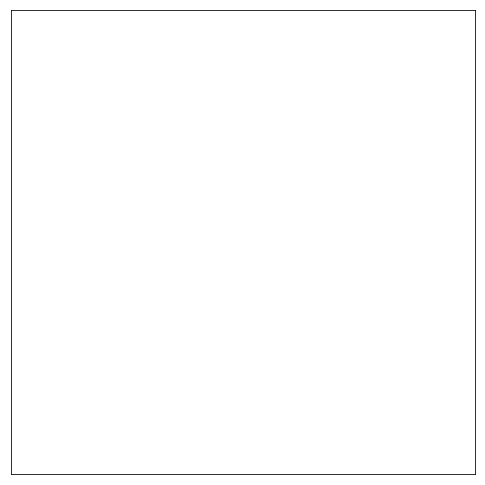

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

Review the `plot_data` function in `utils.py` to understand how the 30-dimensional training labels in `y_train` are mapped to facial locations, as this function will prove useful for your pipeline.

### CNN Architecture

In [17]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense

## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)
model = Sequential()

# Hyperparams tuned before settling on this final architecture:
# kernel_size [2,3,4] -> 3 generalizes better than 2, 4 also adds improvement but requires more training epochs to perform well
# number of convolution+maxpooling layers [3,4] -> 4 generalizes better, so we 're capturing meaningful higher level image features
# tried batchnorm() after convolutional layers with no success (expected?)
model.add(Convolution2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Hyperparams tuned before settling on this final architecture:
# Add an extra dense layer so the model can come up with more sophisticated boundary decision regions
# Dropout rates [0.25, 0.3, 0.4, 0.5] -> got best generalization results at 0.5
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30))

# Summarize the model
model.summary()

ModuleNotFoundError: No module named 'keras'

---
<a id='step6'></a>

## Step 6: Compile and Train the Model

After specifying your architecture, you'll need to compile and train the model to detect facial keypoints'

### Compile and Train the Model

In [18]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle

## Hypertune the optimizer
optimizers = [SGD(), RMSprop(), Adagrad(), Adadelta(), Adam(), Adamax(), Nadam()]
names = ["CNN_2472350_SGD", "CNN_2472350_RMSprop", "CNN_2472350_Adagrad", "CNN_2472350_Adadelta", "CNN_2472350_Adam", "CNN_2472350_Adamax", "CNN_2472350_Nadam"]
histories = {}
epochs = 30
batch_size = 16

for optimizer,name in zip(optimizers, names):
    print("Evaluating " + name)
    model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mse'])
    checkpointer = ModelCheckpoint(filepath = "saved_models/weights_best_val_MSE_" + name + ".hdf5", verbose = 1, save_best_only = True)
    histories[name] = model.fit(X_train, y_train, validation_split = 0.2, epochs = epochs, batch_size = batch_size, callbacks = [checkpointer], verbose = 1)


ModuleNotFoundError: No module named 'keras'

In [19]:
# Lifted from http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# Plot the validation MSEs of all the models trained above with different optimizers
for name in names:
    plt.plot(histories[name].history['val_mean_squared_error'])
plt.title('Validation MSEs with Different Optimizers')
plt.ylabel('Validation MSE')
plt.xlabel('Epoch')
plt.ylim(0.0008, 0.0013)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.legend(names, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'names' is not defined

In [20]:
# Select the final model by picking the one with the lowest validation MSE (Adamax)
final_model = "CNN_2472350_Adamax"
model.load_weights("saved_models/weights_best_val_MSE_" + final_model + ".hdf5")

NameError: name 'model' is not defined

---
<a id='step7'></a>

## Step 7: Visualize the Loss and Test Predictions

In [21]:
## TODO: Visualize the training and validation loss of your neural network
# Lifted from http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(histories[final_model].history['mean_squared_error'])
plt.plot(histories[final_model].history['val_mean_squared_error'])
plt.title('Model Train and Validation MSEs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.legend(['train', 'validation'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'histories' is not defined

### Visualizing a Subset of the Test Predictions

In [22]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

NameError: name 'model' is not defined

## Step 8: Completing the pipeline

### Facial Keypoints Detector

Use the OpenCV face detection functionality you built in previous Sections to expand the functionality of your keypoints detector to color images with arbitrary size. Steps:
1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

In [27]:
# Load in color image for face detection
image = cv2.imread('images/sachinim.jpg')

# Convert the image to RGB colorspace
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot our image
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)

NameError: name 'cv2' is not defined

In [28]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_copy)

# Get the bounding box for each detected face
for (x_face,y_face,w_face,h_face) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x_face, y_face), (x_face+w_face, y_face+h_face), (255,0,0), 3)

# Display the image with the detections
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

NameError: name 'cv2' is not defined

In [29]:
## TODO : Paint the predicted keypoints on the test image

# The following ndarray will hold our CNN input batch
faces_96x96_cnn = np.ndarray(shape=(len(faces),96,96,1), dtype=float, order='F')

# Process each face individually
face_idx = 0
for (x_face,y_face,w_face,h_face) in faces:
    # Extract a face from the GREYSCALE image
    face = gray[y_face:y_face+h_face,x_face:x_face+w_face]
    # Resize it to match our traning set image size (96x96) and normalize it to be in [0,1]
    face_96x96 = cv2.resize(face, (96,96), interpolation = cv2.INTER_CUBIC) / 255
    # Add it to our CNN input batch
    faces_96x96_cnn[face_idx,:,:,0] = face_96x96
    face_idx = face_idx + 1

# Validate CNN input batch shape
print(faces_96x96_cnn.shape)

# Predict facial keypoints
facial_keypoints = model.predict(faces_96x96_cnn)

NameError: name 'faces' is not defined

In [30]:
# Visually validate predictions
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(faces)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(faces_96x96_cnn[i], facial_keypoints[i], ax)    

NameError: name 'faces' is not defined

NameError: name 'faces' is not defined

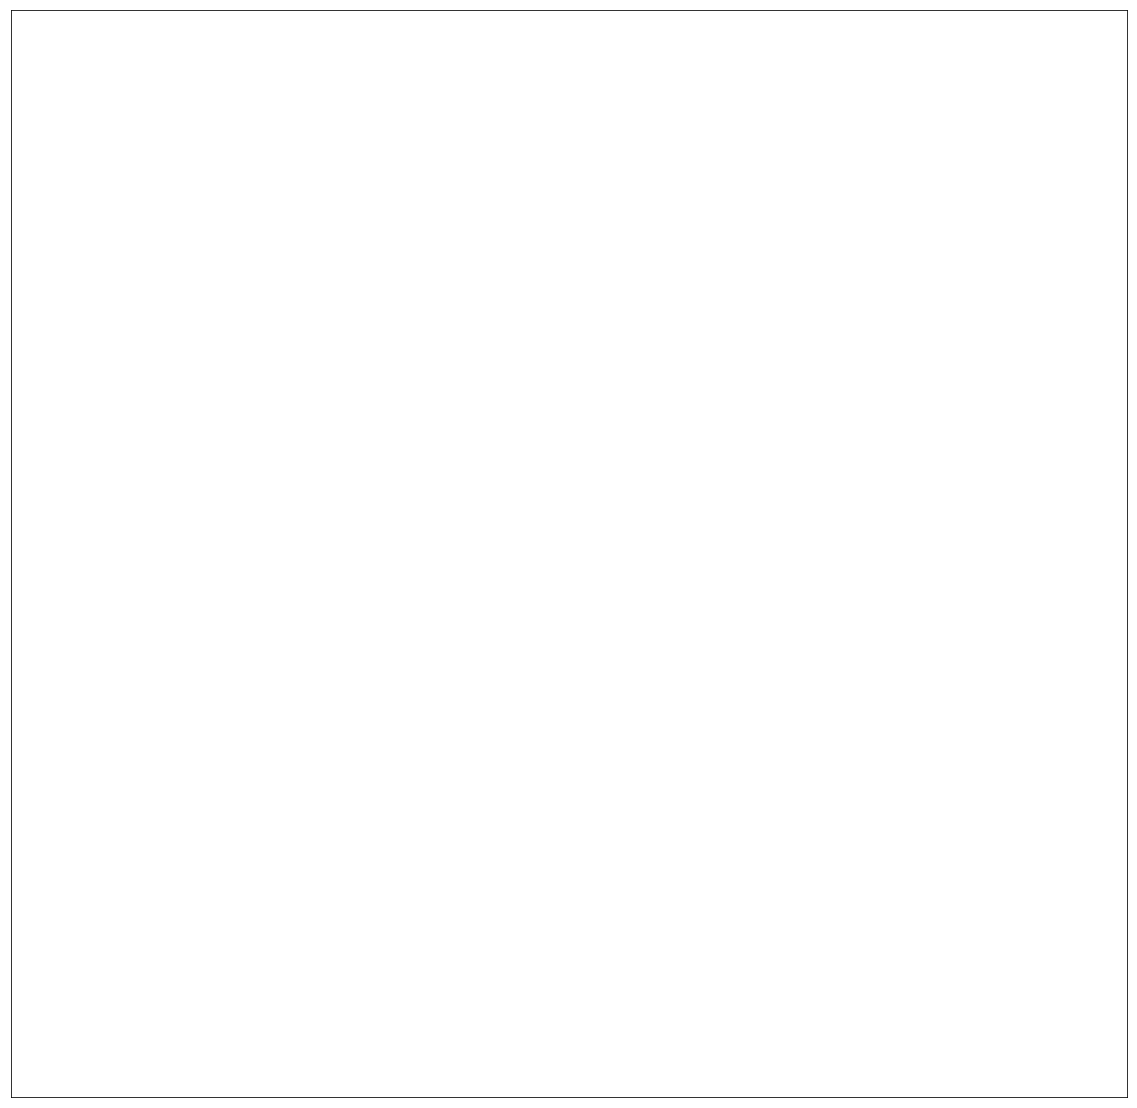

In [31]:
## TODO : Paint the predicted keypoints on the test image
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

# The following ndarray will hold our CNN 1-sample input batch
faces_96x96_cnn = np.ndarray(shape=(1,96,96,1), dtype=float, order='F')

# Process each face individually
for (x_face,y_face,w_face,h_face) in faces:
    # Extract a face from the GREYSCALE image
    face = gray[y_face:y_face+h_face, x_face:x_face+w_face]
    # Resize it to match our traning set image size (96x96) and normalize it to be in [0,1]
    face_96x96 = cv2.resize(face, (96,96), interpolation = cv2.INTER_CUBIC) / 255
    # Copy it in our CNN 1-sample input batch
    faces_96x96_cnn[0,:,:,0] = face_96x96
    # Predict facial keypoints
    facial_keypoints = model.predict(faces_96x96_cnn)[0]
    # Overlay the facial keypoints in the original (color, uncropped) image
    # Refactored code from utils.py:
    ax1.scatter(facial_keypoints[0::2] * (w_face / 2) + (w_face / 2) + x_face,
                facial_keypoints[1::2] * (h_face / 2) + (h_face / 2) + y_face,
                marker='o', c='c', s=40)

# Display the image
ax1.set_title('Image with Facial Keypoints')
ax1.imshow(image_with_detections)

### Adding a filter using facial keypoints to your laptop camera

In [32]:
import cv2
import time 
from keras.models import load_model

def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("Facial Keypoints [Press ESC to exit]")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # The following ndarray will hold our CNN 1-sample input batch
    faces_96x96_cnn = np.ndarray(shape=(1,96,96,1), dtype=float, order='F')
    
    # Keep video stream open
    while rval:
        # Convert the RGB video frame to grayscale and detect the face(s) in it
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        
        # Process each detected face to display bounding rectangle and facial keypoints
        for (x_face,y_face,w_face,h_face) in faces:
            # Extract a face from the GREYSCALE image
            face = gray[y_face:y_face+h_face, x_face:x_face+w_face]
            # Resize it to match our traning set image size (96x96) and normalize it to be in [0,1]
            face_96x96 = cv2.resize(face, (96,96), interpolation = cv2.INTER_CUBIC) / 255
            # Copy it in our CNN 1-sample input batch
            faces_96x96_cnn[0,:,:,0] = face_96x96
            # Predict facial keypoints
            facial_keypoints = model.predict(faces_96x96_cnn)[0]
            # Display each face rectangle in the color image
            cv2.rectangle(frame, (x_face,y_face), (x_face+w_face,y_face+h_face), (0,0,255), 3)  
            # Overlay the facial keypoints in the original (color, uncropped) image
            facial_keypoints[0::2] = facial_keypoints[0::2] * (w_face / 2) + (w_face / 2) + x_face
            facial_keypoints[1::2] = facial_keypoints[1::2] * (h_face / 2) + (h_face / 2) + y_face
            for (x_point,y_point) in zip(facial_keypoints[0::2], facial_keypoints[1::2]):
                cv2.circle(frame, (x_point, y_point), 3, (0,255,0), -1)
            
        # Plot image from camera with identity protected
        cv2.imshow("Facial Keypoints [Press ESC to exit]", frame)
        
        # Exit functionality
        key = cv2.waitKey(20)
        if key == 27: # Exit by pressing ESC key
            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()                

ModuleNotFoundError: No module named 'cv2'

In [33]:
# Run your keypoint face painter
laptop_camera_go()

NameError: name 'laptop_camera_go' is not defined

### (Adding a filter using facial keypoints

In [34]:
import matplotlib.patches as patches

# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Plot the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
# Below we show the (guessed) bounding rectangle for the eyes underneath the sunglasses
# We'll use the bounding rectangle to figure out how to map the glasses on the eye keypoints
# Values were obtained via experimentation
glasses_triangle_vertices = np.array([(280,220), (2800,220), (280,600)]).astype(np.float32)
ax1.add_patch(
    patches.Rectangle(
        (280, 220),   # (x,y)
        2800-280,          # width
        600-220,          # height
        alpha=0.6      # remove background
    )
)
ax1.axis('off');

NameError: name 'cv2' is not defined

In [35]:
# Print out the shape of the sunglasses image
print ('The sunglasses image has shape: ' + str(np.shape(sunglasses)))

NameError: name 'sunglasses' is not defined

In [36]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

NameError: name 'sunglasses' is not defined

In [37]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

NameError: name 'cv2' is not defined

NameError: name 'cv2' is not defined

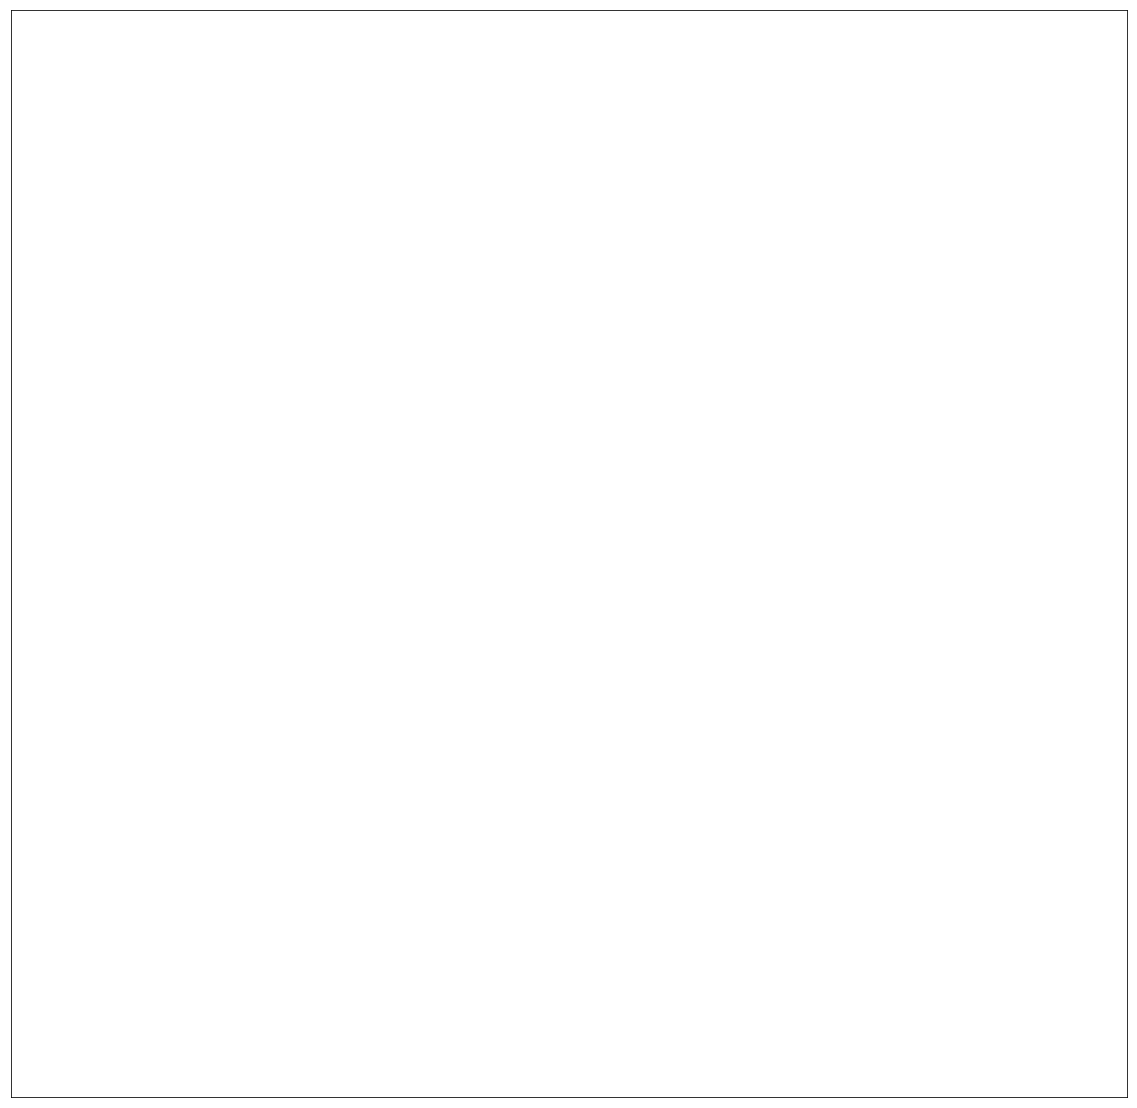

In [38]:
## (Optional) TODO: Use the face detection code we saw in Section 1 with your trained conv-net to put
## sunglasses on the individuals in our test image
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# The following ndarray will hold our CNN 1-sample input batch
faces_96x96_cnn = np.ndarray(shape=(1,96,96,1), dtype=float, order='F')

# Convert the RGB video frame to grayscale and detect the face(s) in it
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Process each detected face to display bounding rec28tangle and facial keypoints
for (x_face,y_face,w_face,h_face) in faces:
    # Extract a face from the GREYSCALE image
    face = gray[y_face:y_face+h_face, x_face:x_face+w_face]
    # Resize it to match our traning set image size (96x96) and normalize it to be in [0,1]
    face_96x96 = cv2.resize(face, (96,96), interpolation = cv2.INTER_CUBIC) / 255
    # Copy it in our CNN 1-sample input batch
    faces_96x96_cnn[0,:,:,0] = face_96x96
    # Predict facial keypoints
    facial_keypoints = model.predict(faces_96x96_cnn)[0]
    # Extract the facial keypoints for the eyes only and remap them to the original image
    facial_keypoints[0::2] = facial_keypoints[0::2] * (w_face / 2) + (w_face / 2) + x_face
    facial_keypoints[1::2] = facial_keypoints[1::2] * (h_face / 2) + (h_face / 2) + y_face
    eye_keypoints=[]
    for (x_point,y_point) in zip(facial_keypoints[0:20:2], facial_keypoints[1:20:2]):
        eye_keypoints.append((x_point, y_point))
    # Compute the bounding rectangle for the eyes
    eye_boundingRect = cv2.boundingRect(np.array(eye_keypoints).astype(np.float32))
    # Build the triangle vertices needed by cv2.getAffineTransform()
    eyes_triangle_vertices = np.array([(eye_boundingRect[0],eye_boundingRect[1]), (eye_boundingRect[0]+eye_boundingRect[2],eye_boundingRect[1]), (eye_boundingRect[0],eye_boundingRect[1]+eye_boundingRect[3])]).astype(np.float32)
    # Compute the affine transform matrix from the two sets of three points (glasses and eyes)
    map_matrix = cv2.getAffineTransform(glasses_triangle_vertices, eyes_triangle_vertices)
    # Apply the affine transformation to the glasses
    transformed_sunglasses = cv2.warpAffine(sunglasses, map_matrix, (image.shape[1], image.shape[0]))
    # Build a binary mask of the pixels where the sunglasses are
    transformed_sunglasses_mask = transformed_sunglasses[:,:,3] > 0
    # Overwrite pixels in the original image with sunglasses pixels using their mask
    image[:,:,:][transformed_sunglasses_mask] = transformed_sunglasses[:,:,0:3][transformed_sunglasses_mask]

# Plot image
ax1.set_title('Image with Sunglasses Painted On')
ax1.imshow(image)

###  Adding a filter using facial keypoints to your laptop camera 


In [39]:
import cv2
import time 
from keras.models import load_model

def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("Sunglasses Painter [Press ESC to exit]")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # The following ndarray will hold our CNN 1-sample input batch
    faces_96x96_cnn = np.ndarray(shape=(1,96,96,1), dtype=float, order='F')
    
    # Keep video stream open
    while rval:
        # Convert the RGB video frame to grayscale and detect the face(s) in it
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        
        # Process each detected face to display bounding rectangle and facial keypoints
        for (x_face,y_face,w_face,h_face) in faces:
            # Extract a face from the GREYSCALE image
            face = gray[y_face:y_face+h_face, x_face:x_face+w_face]
            # Resize it to match our traning set image size (96x96) and normalize it to be in [0,1]
            face_96x96 = cv2.resize(face, (96,96), interpolation = cv2.INTER_CUBIC) / 255
            # Copy it in our CNN 1-sample input batch
            faces_96x96_cnn[0,:,:,0] = face_96x96
            # Predict facial keypoints
            facial_keypoints = model.predict(faces_96x96_cnn)[0]
            # Extract the facial keypoints for the eyes only and remap them to the original image
            facial_keypoints[0::2] = facial_keypoints[0::2] * (w_face / 2) + (w_face / 2) + x_face
            facial_keypoints[1::2] = facial_keypoints[1::2] * (h_face / 2) + (h_face / 2) + y_face
            eye_keypoints=[]
            for (x_point,y_point) in zip(facial_keypoints[0:20:2], facial_keypoints[1:20:2]):
                eye_keypoints.append((x_point, y_point))
            # Compute the bounding rectangle for the eyes
            eye_boundingRect = cv2.boundingRect(np.array(eye_keypoints).astype(np.float32))
            # Build the triangle vertices needed by cv2.getAffineTransform()
            eyes_triangle_vertices = np.array([(eye_boundingRect[0],eye_boundingRect[1]), (eye_boundingRect[0]+eye_boundingRect[2],eye_boundingRect[1]), (eye_boundingRect[0],eye_boundingRect[1]+eye_boundingRect[3])]).astype(np.float32)
            # Compute the affine transform matrix from the two sets of three points (glasses and eyes)
            map_matrix = cv2.getAffineTransform(glasses_triangle_vertices, eyes_triangle_vertices)
            # Apply the affine transformation to the glasses
            transformed_sunglasses = cv2.warpAffine(sunglasses, map_matrix, (frame.shape[1], frame.shape[0]))
            # Build a binary mask of the pixels where the sunglasses are
            transformed_sunglasses_mask = transformed_sunglasses[:,:,3] > 0
            # Overwrite pixels in the original image with sunglasses pixels using their mask
            frame[:,:,:][transformed_sunglasses_mask] = transformed_sunglasses[:,:,0:3][transformed_sunglasses_mask]
            
        # Plot image from camera with sunglasses painted on
        cv2.imshow("Sunglasses Painter [Press ESC to exit]", frame)
        
        # Exit functionality
        key = cv2.waitKey(20)
        if key == 27: # Exit by pressing ESC key
            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()                

ModuleNotFoundError: No module named 'cv2'

In [40]:
# Run sunglasses painter
laptop_camera_go()

NameError: name 'laptop_camera_go' is not defined

Screen cap of the output of laptop_camera_go():

![](images/Sunglasses Painter [Press ESC to exit]2.jpg)